In [46]:
# import standard libraries
# импортирую стандартные библиотеки
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# import models and metrics
# импортирую модели и метрики
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

In [47]:
# Есть исходный файл. Из него надо выделить тренировочный датасет и тестовый датасет
# разбиение будет в пропорции 85 на 15

df = pd.read_csv('diamonds.csv')
df['split'] = np.random.randn(df.shape[0], 1)

temp1 = np.random.rand(len(df)) <= 0.85

train = df[temp1]
test = df[~temp1]

#можно удалить ненужные столбцы
train.drop('split', axis= 1 , inplace= True )
test.drop('split', axis= 1 , inplace= True )

#определим ценль
target = train['price']

In [48]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45856 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45856 non-null  int64  
 1   carat       45856 non-null  float64
 2   cut         45856 non-null  object 
 3   color       45856 non-null  object 
 4   clarity     45856 non-null  object 
 5   depth       45856 non-null  float64
 6   table       45856 non-null  float64
 7   price       45856 non-null  int64  
 8   x           45856 non-null  float64
 9   y           45856 non-null  float64
 10  z           45856 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.2+ MB


In [49]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8084 entries, 4 to 53934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8084 non-null   int64  
 1   carat       8084 non-null   float64
 2   cut         8084 non-null   object 
 3   color       8084 non-null   object 
 4   clarity     8084 non-null   object 
 5   depth       8084 non-null   float64
 6   table       8084 non-null   float64
 7   price       8084 non-null   int64  
 8   x           8084 non-null   float64
 9   y           8084 non-null   float64
 10  z           8084 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 757.9+ KB


In [50]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [51]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
60,61,0.35,Ideal,I,VS1,60.9,57.0,552,4.54,4.59,2.78
61,62,0.30,Premium,D,SI1,62.6,59.0,552,4.23,4.27,2.66


In [52]:
#корректное название для столбца
train.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )
test.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )

In [53]:
# target variable
train['price'].describe()

count    45856.000000
mean      3937.349747
std       3990.728431
min        326.000000
25%        953.000000
50%       2415.000000
75%       5331.000000
max      18818.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

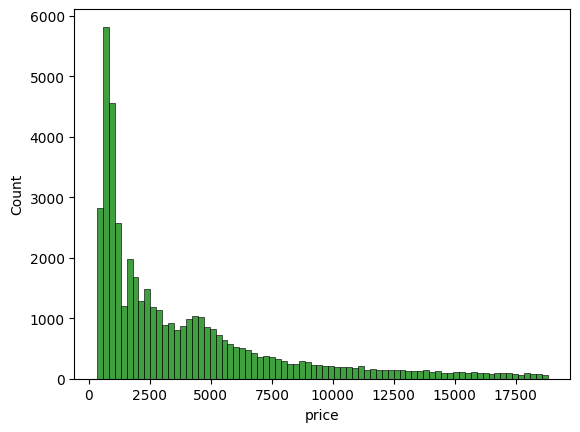

In [54]:
# visualisation of 'price' distribution  
sns.histplot(train['price'], color='g')

In [55]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')
